# Assignment-1: Data Visualization with Haberman Dataset 

# Habermans Survival Data Set

About the Data Set:- 
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:

1.Age of patient at time of operation (numerical)            
2.Patient's year of operation (year - 1900, numerical)                             
3.Number of positive axillary nodes detected (numerical)                    
4.Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

'''downlaod Habernets csv  from https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1#haberman.csv'''
#Load habernets into a pandas dataFrame.
data = pd.read_csv("haberman.csv")#loads the data in haberman.csv file into data

In [4]:
#Number of data points(rows) and Features(columns)
print(data.shape)

(306, 4)


***Observations***                                          
 There are 306 datapoints(rows) and 4 features(columns)

In [5]:
#Column names in our dataset
print (data.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [6]:
'''to change the names of the columns
data.columns=['age','year','nodes','Status']
print(data.columns)
'''

"to change the names of the columns\ndata.columns=['age','year','nodes','Status']\nprint(data.columns)\n"

In [7]:
#to get information about the data set like the type of the data in the file(int)
#we can also check weather their is a null value or not by looking at the type if there is null value if it is 'object' it has NULL value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [8]:
#to check the number of Null values
np.sum(data.isna())

age       0
year      0
nodes     0
status    0
dtype: int64

***Observations***
 There are no null values the Habermans dataset 

In [9]:
#to get the details like number of observations, min,max,25%,50%,75% ,mean,std
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


***Observations:-***            
1.The average of the patients is 52                                
2.Most of the patients have 4 nodes on an average                          
3.75% of patients have below 60 years of age                                                   
4.75% of the patients have 4 nodes                                     
5.75% of the patients Died within 5 years           

In [10]:
#to check number of patients survived 5 years or longer and number of patients died within 5 year
data['status'].value_counts()
#slightly Balanced data Set

1    225
2     81
Name: status, dtype: int64

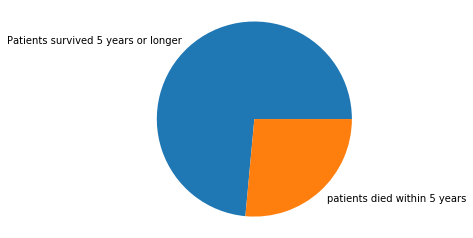

In [11]:
#pie chart representation
status=data['status'].value_counts()

labels='Patients survived 5 years or longer','patients died within 5 years'
sizes=[status[1],status[2]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

***Observations:***                           
1.255 Patients survived 5 years or longer                      
2.81 patients died within 5 years               


In [12]:
#to find the corelation between the columns
data.corr()

,age,year,nodes,status
age,1.000000,0.089529,-0.063176,0.067950
year,0.089529,1.000000,-0.003764,-0.004768
nodes,-0.063176,-0.003764,1.000000,0.286768
status,0.067950,-0.004768,0.286768,1.000000


**Obeservation:**                                        
From the above table it is clear that nodes and status are corelated                       
age and status are also corelated

***Observations***                  
1.75% of the patients who had undergone surgery for breast cancer died within 5years            
2.75% of the patients are of age 60                            
3.Most patients(75%) have 4 nodes

#  2-D Scatter Plot

In [13]:
#for checking relations between the features

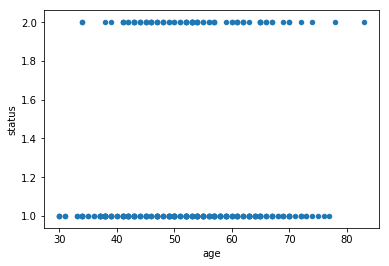

In [14]:
#2-D scatter plot:

data.plot(kind='scatter', x='age', y='status') ;
plt.show()

***Observation:***                                        
from the above scatter plot of age and status we can't clearly state the relation between the age and status 

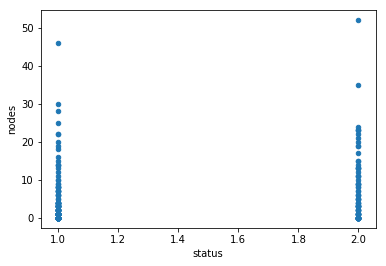

In [15]:
#2-D scatter plot:

data.plot(kind='scatter', x='status', y='nodes') ;
plt.show()

***Observation:***                                        
from the above scatter plot of nodes and status we can't clearly state the co-relation of nodes and status 

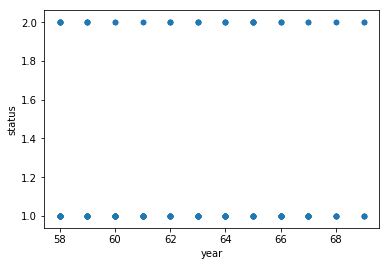

In [16]:
#2-D scatter plot:

data.plot(kind='scatter', x='year', y='status') ;
plt.show()
 

***Observation:***                                        
scatter plot of age and status does'nt clearly states the relation between the year and status of the patient 

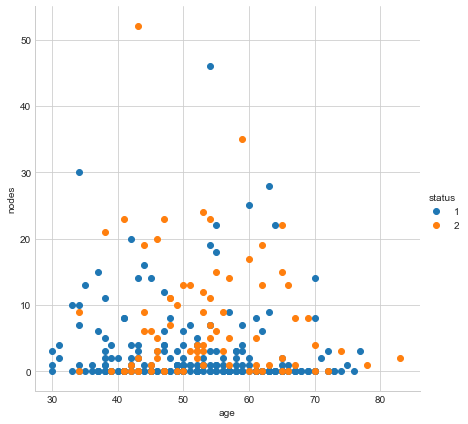

In [17]:
sns.set_style("whitegrid");
sns.FacetGrid(data,hue='status',size=6).map(plt.scatter,'age','nodes').add_legend()
plt.show()
#1->the patient survived 5 years or longer
#2->patient died within 5 year

***Observation:***                                        
Scatter plots of the features of Haberman dataset does'nt clearly depict the relation between the features and Status of the patient 

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

# Pair-plot

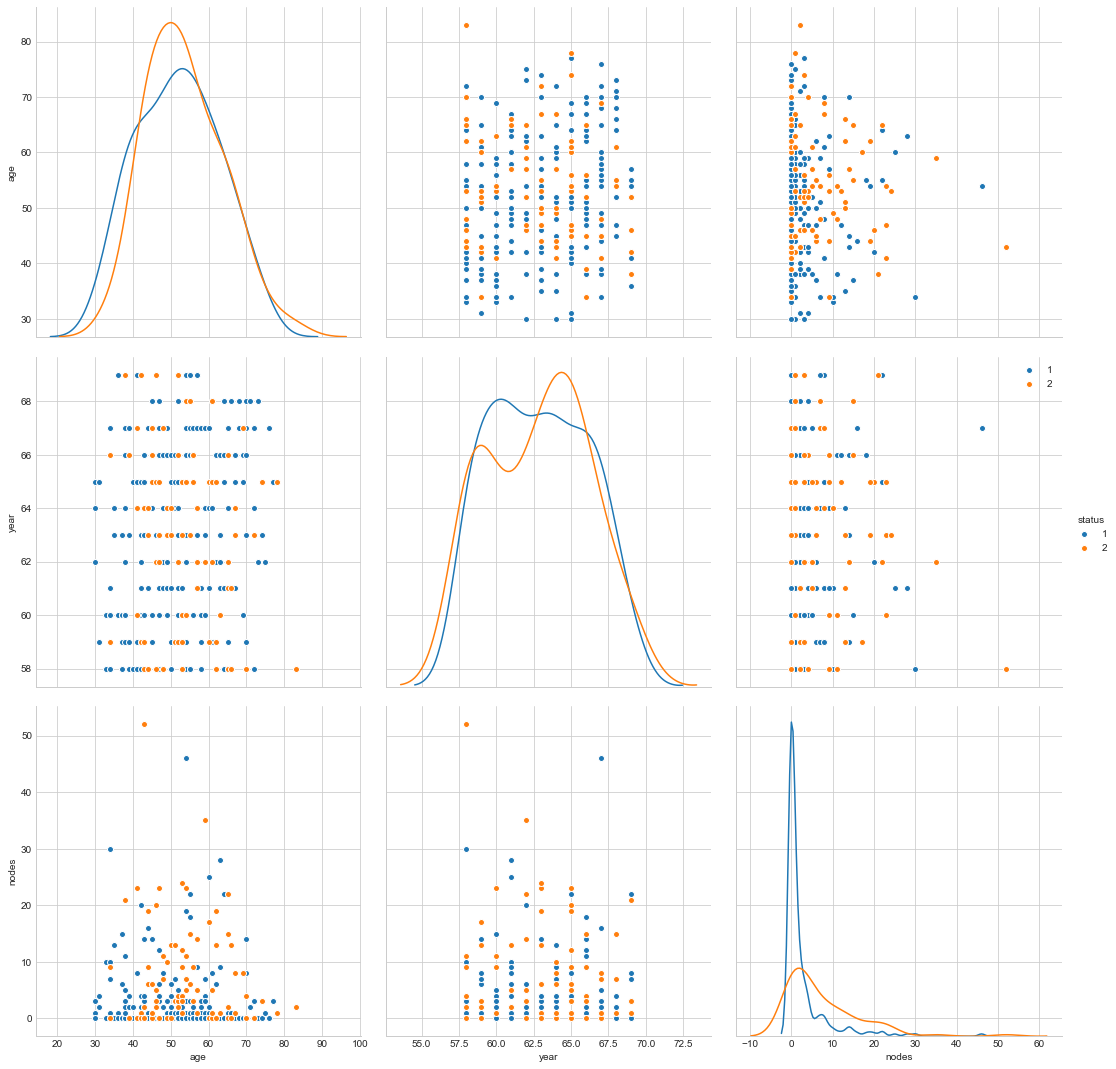

In [64]:
# pairwise scatter plot: Pair-Plot.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data,hue='status',vars=['age','year','nodes'],size=5,diag_kind='kde');
plt.legend()
plt.show() 
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

***Observation:***                         
1.Almost all the Patients are of age 30 - 80       
2.Number of nodes many of the patients have are below 20

# (3.4) Histogram, PDF, CDF

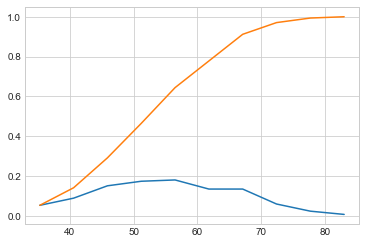

In [54]:
counts,bin_edges=np.histogram(data['age'],bins=10,density=True)
pdf=counts/(sum(counts))
#print(pdf)
#print(bin_edges) 
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

In [27]:
# Or we can use the percentile concept to get the same information
print(np.percentile(data['age'],np.arange(0,100,25)))#for calculating quantiles(0,25,50,75)
print(np.percentile(data['age'],95))#for caluculating 95th percentile

[30.   44.   52.   60.75]
70.0


***Observations:***                                                                        
1.50% of the patients have the age of less than 52                                  
2.95% of the patients have age less than 70          

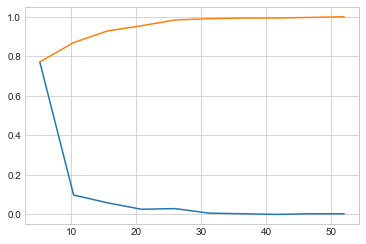

19.75


In [51]:
counts,bin_edges=np.histogram(data['nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
#print(pdf)
#print(bin_edges) 
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

print(np.percentile(data['nodes'],95))#for caluculating 95th percentile

***Observations:***                                        
  95% of the patients have less than 20 nodes

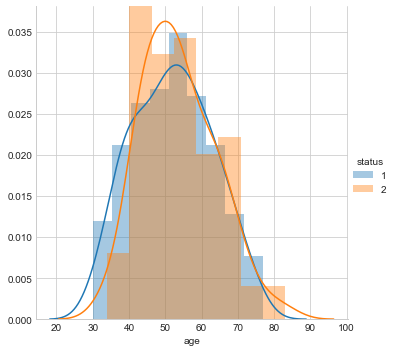

In [33]:
sns.FacetGrid(data,hue='status',size=5).map(sns.distplot,'age').add_legend()
plt.show()

***Obesrvations***                 
 Patients of age 30-40, 60-68 and 70-76 survived for more than 5 years  

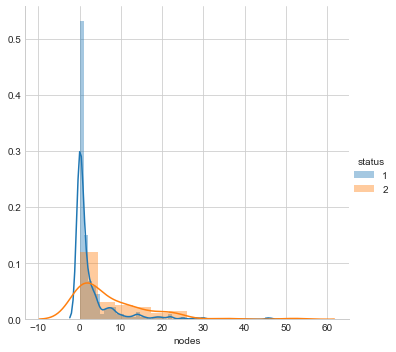

In [34]:
sns.FacetGrid(data, hue='status', size=5).map(sns.distplot, 'nodes').add_legend();
plt.show();

***Obesrvations***                                             
 patients who had less number of nodes lived for more than 5 years  

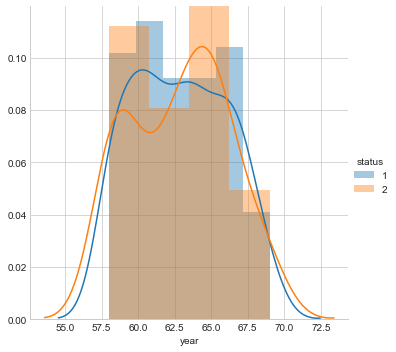

In [35]:
sns.FacetGrid(data,hue='status',size=5).map(sns.distplot,'year').add_legend();
plt.show()

***Obesrvations***                          
    patients with year of treatement 61-64 and 66-67 lived for more than 5year compared to others

***Obesrvations***                 
1.Patients of age 30-40, 60-68 and 70-76 survived for more than 5 years                    
2.patients who had less number of nodes lived for more than 5 years              
3.patients with year of treatement 61-64 and 66-67 lived for more than 5year compared to others

# Box plot and Whiskers

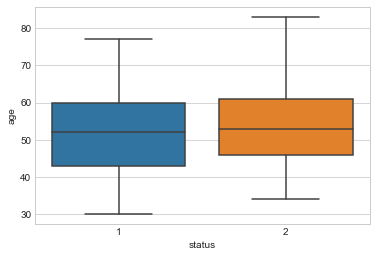

In [36]:
#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='status',y='age', data=data)
plt.show()

***Observation***                           
Patients who lived  for 5 years or more  have age ranging from 30 to 78                                       
Patients who died within 5 years have age ranging ranging from 33 to 83 

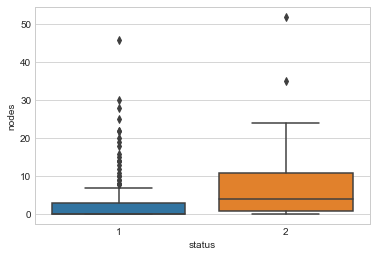

In [67]:
sns.boxplot(x='status',y='nodes', data=data)
plt.show()

***Observation***                           
Most of the Patients who lived  for 5 years or more  had nodes less than 7                 
75% of the Patients who lived  for 5 years or more  had 4 nodes                                   
50%  of the Patients who died within 5 years had more than 4 nodes 

# Violin plots

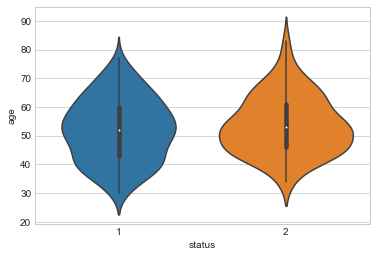

In [68]:
sns.violinplot(x="status", y="age", data=data, size=10)
plt.show()

***Observations:***                                       
1.75% of the patients who lived for 5 years or more than  have age below 60                    
2.75% of the patients who died within  5 years have age below 63

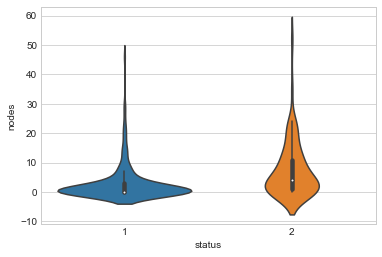

In [65]:
sns.violinplot(x="status", y="nodes", data=data, size=10)
plt.show()

***Observations:***                                
1.75% of the patients who died within 5 year of operation have less than 11 nodes                                       
2.75% of the patients who lived for 5 years or more have nodes less than 4

# Overall Summary

1.Patients who suffer from breast cancer are of age 30 - 80                
2.75% patients had 4 nodes                                      
3.Status of a patients who had undergone surgery for breast cancer depends on age and number of nodes                          
4.75% of patients who had less number of nodes(4 nodes) lived for more than 5 years                       
5.75% of the patients who had undergone surgery for breast cancer died within 5years                                            
6.Patients of age 30-40, 60-68 and 70-76 survived for more than 5 year 

1.There are 75% chances that the patients who will undergo surgery for breast cancer will die                
2.patient who has less number of nodes has more chances of survival